In [1]:
# !pip install biopython

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import sklearn
import warnings
warnings.filterwarnings('ignore')

from Bio import Medline # it is used extract pmid files in medical fields.

In [5]:
def read_medline_data(filename):
    recs = Medline.parse(open(filename, 'r',encoding='utf-8'))
    text = pd.DataFrame(columns = ['pmid','title', 'authors', 'abstract','year'])
    for rec in recs:
        try:
            abstr = rec["AB"]
            title = rec["TI"]
            auths = rec["AU"]
            pmid  = rec['PMID']
            year = rec['DP']
            #print(title)
            data=pd.DataFrame([[pmid,title, auths, abstr,year]],  columns=['pmid','title', 'authors', 'abstract','year'])
            # print(data)
            text = pd.concat([text,data], ignore_index=True, sort=False)
        except:
            pass
    return text

In [66]:
# file_path = 'pubmed-heartdisea-set.txt' 
# df_f = read_medline_data(file_path)

In [52]:
df_f.head()

,pmid,title,authors,abstract,year
0,29406940,Heart Disease in Children.,"['Garcia RU', 'Peddy SB']",The pediatric cardiology field has developed r...,2018 Mar
1,31592122,Radiation-induced heart disease: a review of c...,"['Wang H', 'Wei J', 'Zheng Q', 'Meng L', 'Xin ...",With the increasing incidence of thoracic tumo...,2019
2,25459973,Exercise training in patients with heart disea...,"['Gielen S', 'Laughlin MH', ""O'Conner C"", 'Dun...",Over the last decades exercise training has ev...,2015 Jan-Feb
3,37003416,"Viral Heart Disease: Diagnosis, Management, an...","['Liu-Fei F', 'McKinney J', 'McManus BM']","""Viral heart disease"" is a term encompassing n...",2023 Jun
4,35422260,Heart Disease in Pet Birds - Diagnostic Options.,"['Cornelia K', 'Krautwald-Junghanns ME']",Cardiovascular diseases are common in pet bird...,2022 May


In [53]:
# The shape of the df data set is given below.
df_f.shape

(9955, 5)

In [54]:
# There is no missing values present in the data set.
df_f.isna().sum()

pmid        0
title       0
authors     0
abstract    1
year        0
dtype: int64

In [65]:
# df_f.to_csv('Fianl_jouranals_data.csv')

In [51]:
df_f = pd.read_csv('Fianl_jouranals_data.csv',usecols=['pmid', 'title', 'authors', 'abstract', 'year'])
df_f.head()

,pmid,title,authors,abstract,year
0,29406940,Heart Disease in Children.,"['Garcia RU', 'Peddy SB']",The pediatric cardiology field has developed r...,2018 Mar
1,31592122,Radiation-induced heart disease: a review of c...,"['Wang H', 'Wei J', 'Zheng Q', 'Meng L', 'Xin ...",With the increasing incidence of thoracic tumo...,2019
2,25459973,Exercise training in patients with heart disea...,"['Gielen S', 'Laughlin MH', ""O'Conner C"", 'Dun...",Over the last decades exercise training has ev...,2015 Jan-Feb
3,37003416,"Viral Heart Disease: Diagnosis, Management, an...","['Liu-Fei F', 'McKinney J', 'McManus BM']","""Viral heart disease"" is a term encompassing n...",2023 Jun
4,35422260,Heart Disease in Pet Birds - Diagnostic Options.,"['Cornelia K', 'Krautwald-Junghanns ME']",Cardiovascular diseases are common in pet bird...,2022 May


In [55]:
df_f['year'] = df_f['year'].str.extract(r'(\d{4})')

In [56]:
df_f.head()

,pmid,title,authors,abstract,year
0,29406940,Heart Disease in Children.,"['Garcia RU', 'Peddy SB']",The pediatric cardiology field has developed r...,2018
1,31592122,Radiation-induced heart disease: a review of c...,"['Wang H', 'Wei J', 'Zheng Q', 'Meng L', 'Xin ...",With the increasing incidence of thoracic tumo...,2019
2,25459973,Exercise training in patients with heart disea...,"['Gielen S', 'Laughlin MH', ""O'Conner C"", 'Dun...",Over the last decades exercise training has ev...,2015
3,37003416,"Viral Heart Disease: Diagnosis, Management, an...","['Liu-Fei F', 'McKinney J', 'McManus BM']","""Viral heart disease"" is a term encompassing n...",2023
4,35422260,Heart Disease in Pet Birds - Diagnostic Options.,"['Cornelia K', 'Krautwald-Junghanns ME']",Cardiovascular diseases are common in pet bird...,2022


In [57]:
d = df_f.groupby('year')['pmid'].count().reset_index()

In [58]:
d.columns = ['year','Number of journals']

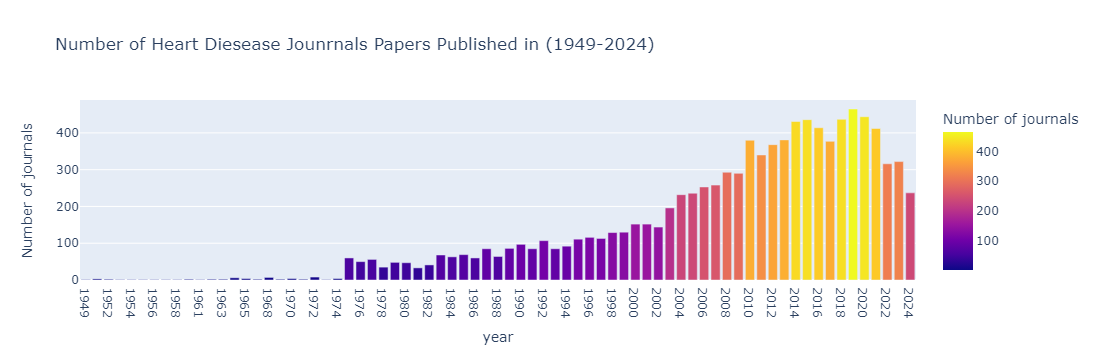

In [59]:
fig = px.bar(d,y = 'Number of journals' ,x = 'year',color = 'Number of journals',title='Number of Heart Diesease Jounrnals Papers Published in (1949-2024)')
fig.show()

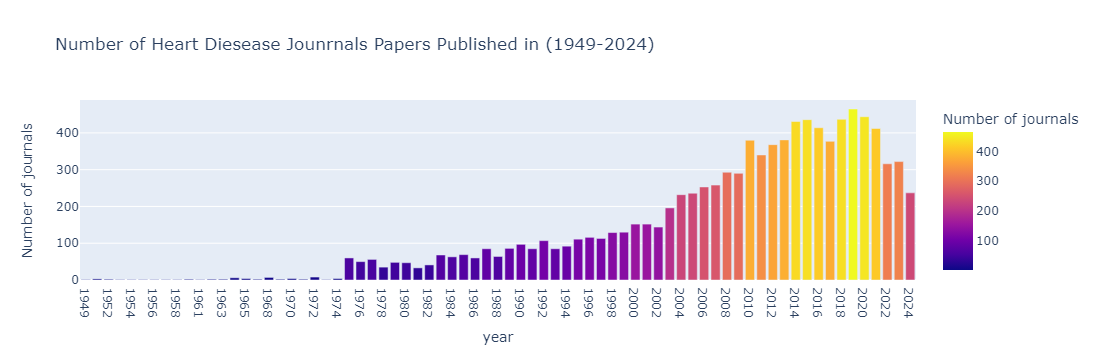

In [60]:
df_f.columns

Index(['pmid', 'title', 'authors', 'abstract', 'year'], dtype='object')

In [119]:
df = df_f.loc[:,['title','abstract']]

In [120]:
df.head()

,title,abstract
0,Heart Disease in Children.,The pediatric cardiology field has developed r...
1,Radiation-induced heart disease: a review of c...,With the increasing incidence of thoracic tumo...
2,Exercise training in patients with heart disea...,Over the last decades exercise training has ev...
3,"Viral Heart Disease: Diagnosis, Management, an...","""Viral heart disease"" is a term encompassing n..."
4,Heart Disease in Pet Birds - Diagnostic Options.,Cardiovascular diseases are common in pet bird...


In [95]:
abstract = df.loc[:,['abstract']]
abstract = abstract['abstract'].fillna("Na")
abstract.isna().sum()

0

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
vec = TfidfVectorizer(stop_words='english')
vec = vec.fit_transform(abstract)

In [100]:
cosine_sim = cosine_similarity(vec,vec)

In [137]:
titles = pd.Series(df.index,index=df['title'])

In [220]:
def journal_papers_recommendation(title, cosine = cosine_sim, number_of_top_jounals = 5 ):
    index =titles[title]
    for index,score in sorted(enumerate(cosine_sim[index]),key = lambda a:a[1],reverse=True)[0:number_of_top_jounals]:
        print (f"--> {df['title'][index]}\n")

In [223]:
df['title'][5698]

'VENTRICULAR SEPTAL DEFECT IN A CRAB-EATING FOX (CERDOCYON THOUS).'

In [224]:
journal_papers_recommendation('VENTRICULAR SEPTAL DEFECT IN A CRAB-EATING FOX (CERDOCYON THOUS).',number_of_top_jounals=4)

--> VENTRICULAR SEPTAL DEFECT IN A CRAB-EATING FOX (CERDOCYON THOUS).

--> Percutaneous closure of ventricular septal defects.

--> Echocardiography in the evaluation of systolic murmurs of unknown cause.

--> The interventricular septum in health and disease.

